In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings

In [2]:
#The below code is used to load the dataset.
df = pd.read_excel('IND.xlsx')
df

,Year,GDP(billions),Human Development Index,Inflation Index,Credit Transfers (in million),Direct Debits (in million),Cheques (in million),Card & e-money (in million),Total digital-payments
0,2012,1827.64,0.600,108.983,518,177,1313,947,1642
1,2013,1856.72,0.607,119.227,915,193,1257,1279,2387
2,2014,2039.13,0.616,126.142,1457,230,1197,1760,3447
3,2015,2103.59,0.624,132.323,2874,289,1096,2736,5899
4,2016,2294.12,0.636,138.278,3858,365,1207,5497,9720
5,2017,2651.46,0.640,143.259,5879,379,1171,8258,14516
6,2018,2701.11,0.642,148.171,11854,534,1124,10839,23227
7,2019,2870.50,0.645,155.227,18486,826,1070,12313,31625


In [3]:
%matplotlib inline

In [4]:
# Data Types
df.dtypes

Year                               int64
GDP(billions)                    float64
Human Development Index          float64
Inflation Index                  float64
Credit Transfers (in million)      int64
Direct Debits (in million)         int64
Cheques (in million)               int64
Card & e-money (in million)        int64
Total digital-payments             int64
dtype: object

In [5]:
# Complete information about data
df.info()

# Data Exploration: Summarize Data
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           8 non-null      int64  
 1   GDP(billions)                  8 non-null      float64
 2   Human Development Index        8 non-null      float64
 3   Inflation Index                8 non-null      float64
 4   Credit Transfers (in million)  8 non-null      int64  
 5   Direct Debits (in million)     8 non-null      int64  
 6   Cheques (in million)           8 non-null      int64  
 7   Card & e-money (in million)    8 non-null      int64  
 8   Total digital-payments         8 non-null      int64  
dtypes: float64(3), int64(6)
memory usage: 704.0 bytes


,Year,GDP(billions),Human Development Index,Inflation Index,Credit Transfers (in million),Direct Debits (in million),Cheques (in million),Card & e-money (in million),Total digital-payments
count,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,2015.50000,2293.033750,0.626250,133.951250,5730.125000,374.125000,1179.375000,5453.625000,11557.875000
std,2.44949,402.808202,0.017128,15.418294,6330.311783,216.972966,81.945866,4514.820102,10897.083207
min,2012.00000,1827.640000,0.600000,108.983000,518.000000,177.000000,1070.000000,947.000000,1642.000000
25%,2013.75000,1993.527500,0.613750,124.413250,1321.500000,220.750000,1117.000000,1639.750000,3182.000000
50%,2015.50000,2198.855000,0.630000,135.300500,3366.000000,327.000000,1184.000000,4116.500000,7809.500000
75%,2017.25000,2663.872500,0.640500,144.487000,7372.750000,417.750000,1219.500000,8903.250000,16693.750000
max,2019.00000,2870.500000,0.645000,155.227000,18486.000000,826.000000,1313.000000,12313.000000,31625.000000


In [6]:
# Shape
df.shape

(8, 9)

In [7]:
# Count Rows
df.count()

Year                             8
GDP(billions)                    8
Human Development Index          8
Inflation Index                  8
Credit Transfers (in million)    8
Direct Debits (in million)       8
Cheques (in million)             8
Card & e-money (in million)      8
Total digital-payments           8
dtype: int64

In [8]:
# No Missing Values
df.isnull().head()

,Year,GDP(billions),Human Development Index,Inflation Index,Credit Transfers (in million),Direct Debits (in million),Cheques (in million),Card & e-money (in million),Total digital-payments
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


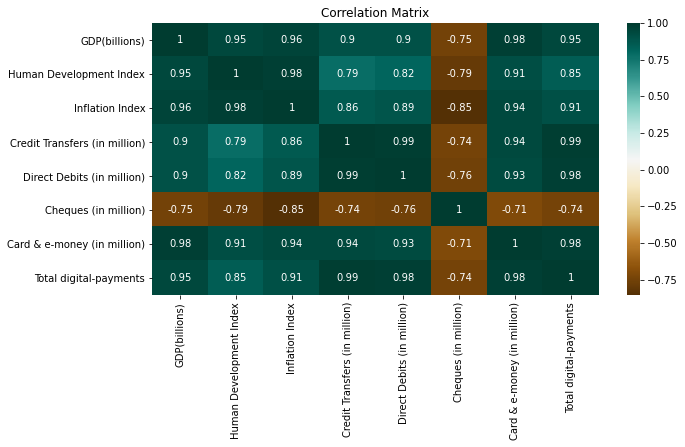

In [9]:
# Correlation Heatmap
plt.figure(figsize = (10, 5))
c = df.corr().iloc[1:9,1:9]
sns.heatmap(c, cmap = "BrBG", annot = True)
plt.title("Correlation Matrix")
plt.show()

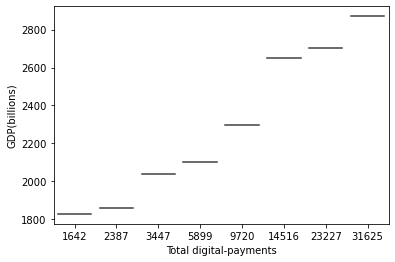

In [10]:
sns.violinplot(x = "Total digital-payments", y = "GDP(billions)", data = df)

### Loading the data into x and y values

In [11]:
x = df[["Direct Debits (in million)","Credit Transfers (in million)","Card & e-money (in million)"]]
y = df[["GDP(billions)"]]
x.head()

,Direct Debits (in million),Credit Transfers (in million),Card & e-money (in million)
0,177,518,947
1,193,915,1279
2,230,1457,1760
3,289,2874,2736
4,365,3858,5497


In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# importing regression algorithm as lr

In [13]:
lr.fit(x, y)

LinearRegression()

In [14]:
lr.fit(xtrain,ytrain)

LinearRegression()

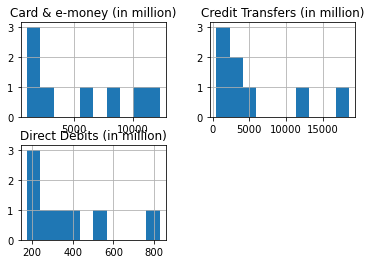

In [15]:
# Plot these variables
x.hist()
plt.show()

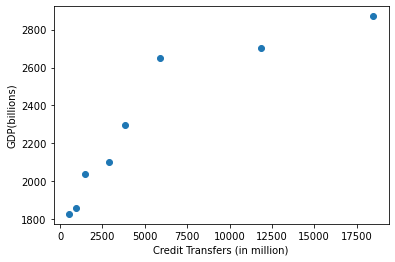

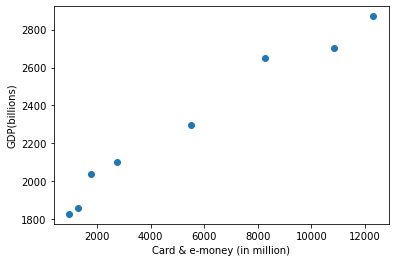

<function matplotlib.pyplot.show(*args, **kw)>

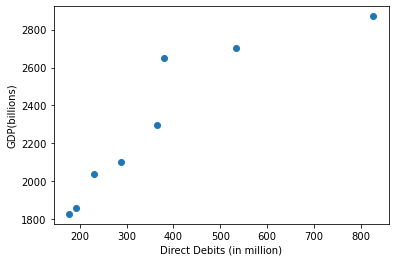

In [16]:
# Now, lets plot each of these Credit Transfers (in million) vs GDP(billions) the , to see how linear is their relation:
plt.scatter( x = df["Credit Transfers (in million)"], y = df["GDP(billions)"])
plt.xlabel("Credit Transfers (in million)")
plt.ylabel("GDP(billions)")
plt.show()
plt.scatter(x = df["Card & e-money (in million)"], y = df["GDP(billions)"])
plt.xlabel("Card & e-money (in million)")
plt.ylabel("GDP(billions)")
plt.show()
plt.scatter(x = df["Direct Debits (in million)"], y = df["GDP(billions)"])
plt.xlabel("Direct Debits (in million)")
plt.ylabel("GDP(billions)")
plt.show

## Unlike regression we are providing x value with multiple variables for accurate prediction of y value, this makes it *Multiple regression*

In [17]:
# Prediction
x = df[["Direct Debits (in million)","Credit Transfers (in million)","Card & e-money (in million)"]]
y = df["GDP(billions)"]
lr = LinearRegression()
lr.fit(x, y)
yhat = lr.predict(x)
pd.DataFrame({"Actual": y, "Predicted": yhat}).head(9)

,Actual,Predicted
0,1827.64,1869.802685
1,1856.72,1901.717720
2,2039.13,1961.516992
3,2103.59,2055.069261
4,2294.12,2370.291317
5,2651.46,2586.387888
6,2701.11,2736.856944
7,2870.50,2862.627194


# prediction of GDP with the help of other types of digital-payments 

In [18]:
print("Direct Debits (in million),","Credit Transfers (in million),","Card & e-money (in million),","The data of these three payments in 2020 are",639,16233,9677)
print("The GDP to be predicted in 2020 is ",lr.predict([[639,16233,9677]])[0] , "in Billions")

Direct Debits (in million), Credit Transfers (in million), Card & e-money (in million), The data of these three payments in 2020 are 639 16233 9677
The GDP to be predicted in 2020 is  2517.8362419062255 in Billions


In [19]:
# Prediction
x = df[["Total digital-payments"]]
y = df["GDP(billions)"]
lr = LinearRegression()
lr.fit(x, y)
yhat = lr.predict(x)
pd.DataFrame({"Actual": y, "Predicted": yhat}).head(9)

,Actual,Predicted
0,1827.64,1945.226999
1,1856.72,1971.358433
2,2039.13,2008.538728
3,2103.59,2094.544466
4,2294.12,2228.568906
5,2651.46,2396.792202
6,2701.11,2702.337059
7,2870.50,2996.903206


In [20]:
print("The GDP to be predicted in 2020 with as single variable digital payment ",lr.predict([[18639]]), "in Billions")

The GDP to be predicted in 2020 with as single variable digital payment  [2541.40951905] in Billions


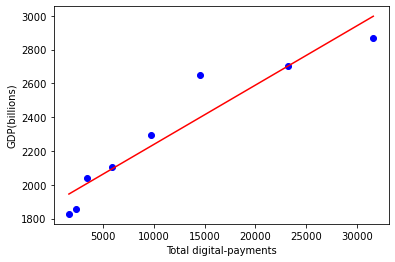

In [21]:
# Plot
plt.scatter(x, y, color = "blue")
plt.plot(x, yhat, "r")
plt.xlabel("Total digital-payments")
plt.ylabel("GDP(billions)")
plt.show()

## accuracy_score calculation 

In [22]:
# Evaluation
r_squared = lr.score(x, y)
r_squared

0.9004049052135729